In [2]:
import numpy as np

In [39]:
A = np.array([
    [1, 1, 1, 1],
    [3**3, 3**2, 3, 1],
    [6**3, 6**2, 6, 1],
    [12**3, 12**2, 12, 1]
])

B = np.array([50, 24, 15, 10])

coeffs = np.linalg.solve(A, B)
a, b, c, d = coeffs

In [25]:
print(a)
print(b)
print(c)
print(d)

-0.22323232323232317
4.798989898989898
-30.793939393939393
76.21818181818182


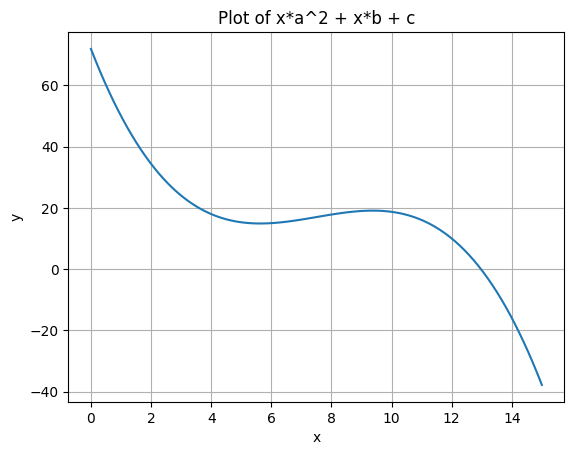

In [40]:
import numpy as np

import matplotlib.pyplot as plt
import math

x = np.linspace(0, 15, 100)
y = ((x**3) * a) + ((x**2) * b) + (x * c) + d


plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of x*a^2 + x*b + c')
plt.grid(True)
plt.show()

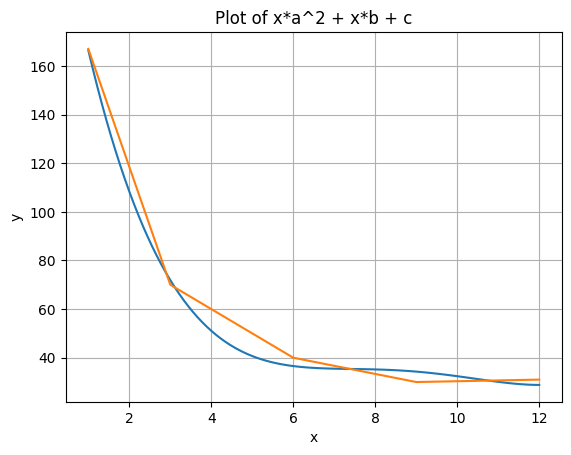

In [85]:
import numpy as np
from scipy.optimize import minimize
from scipy.interpolate import interp1d

# Updated data points
x_data = np.array([1, 3, 6, 9, 12])
y_data = np.array([167, 70, 40, 30, 31])


# Objective function: Mean Squared Error
def objective_mse(x_data, y_data):
    def mse_curried(coefficients): 
        a, b, c, d, e = coefficients
        y_pred = a * x_data**4 + b * x_data**3 + c * x_data**2 + d * x_data + e
        return np.mean((y_data - y_pred)**2)
    
    return mse_curried

# Objective function: Sum of Squared Residuals
def objective_ssr(x_data, y_data):

    def ssr_curried(coefficients):
        a, b, c, d, e= coefficients
        y_pred = a * x_data**4 + b * x_data**3 + c * x_data**2 + d * x_data + e
        return np.sum((y_data - y_pred)**2)
    
    return ssr_curried

# Constraint: The derivative must be non-positive for x in [1, 12]
def constraint(coefficients):
    a, b, c, d, e= coefficients
    # Derivative of the polynomial: 2ax + b <= 0
    return -np.array([4*a*x**3 + 3*b*x**2 + 2*c*x + d for x in np.linspace(1, 12, 100)])

# Initial guess for the coefficients
initial_guess = [0.1, -1, 10, 1, 4]

# Define the constraints dictionary
constraints = {'type': 'ineq', 'fun': constraint}

# Perform the optimization
result = minimize(objective_ssr(x_data, y_data), initial_guess, constraints=constraints)
a, b, c, d, e = result.x

x = np.linspace(1, 12, 100)
y = a * x**4 + b * x**3 + c * x**2 + d * x + e


plt.plot(x, y)
plt.plot(x_data, y_data)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of x*a^2 + x*b + c')
plt.grid(True)
plt.show()

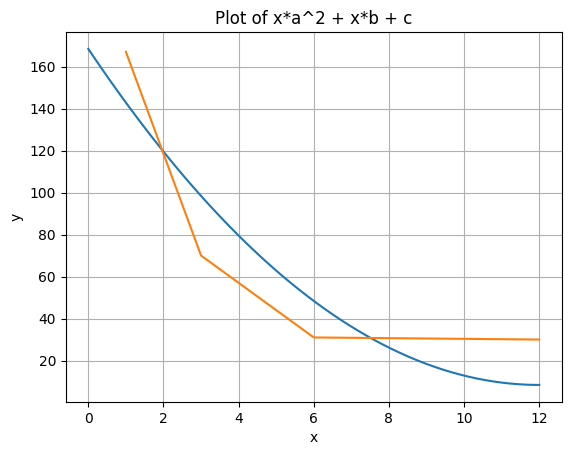

In [98]:
import numpy as np
from scipy.optimize import minimize
from scipy.interpolate import interp1d

# Updated data points
x_data = np.array([1, 3, 6, 12])
y_data = np.array([167, 70, 31, 30])


# Objective function: Mean Squared Error
def objective_mse(x_data, y_data):
    def mse_curried(coefficients): 
        a, b, c = coefficients
        y_pred = a * x_data**2 + b * x_data + c
        return np.mean((y_data - y_pred)**2)
    
    return mse_curried

# Objective function: Sum of Squared Residuals
def objective_ssr(x_data, y_data):

    def ssr_curried(coefficients):
        a, b, c = coefficients
        y_pred = a * x_data**2 + b * x_data + c
        return np.sum((y_data - y_pred)**2)
    
    return ssr_curried

# Constraint: The derivative must be non-positive for x in [1, 12]
def constraint(coefficients):
    a, b, c = coefficients
    # Derivative of the polynomial: 2ax + b <= 0
    return -np.array([2 * a * x + b for x in np.linspace(1, 12, 100)])

# Initial guess for the coefficients
initial_guess = [0.1, -1, 10]

# Define the constraints dictionary
constraints = {'type': 'ineq', 'fun': constraint}

# Perform the optimization
result = minimize(objective_ssr(x_data, y_data), initial_guess, constraints=constraints)
a, b, c = result.x

x = np.linspace(0, 12, 100)
y = a * x**2 + b * x + c


plt.plot(x, y)
plt.plot(x_data, y_data)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of x*a^2 + x*b + c')
plt.grid(True)
plt.show()

Optimized parameters:
a: 11.999999999999998
b: 1.0000000002515528
c: 11.999999999999998
d: 11.999999999999998


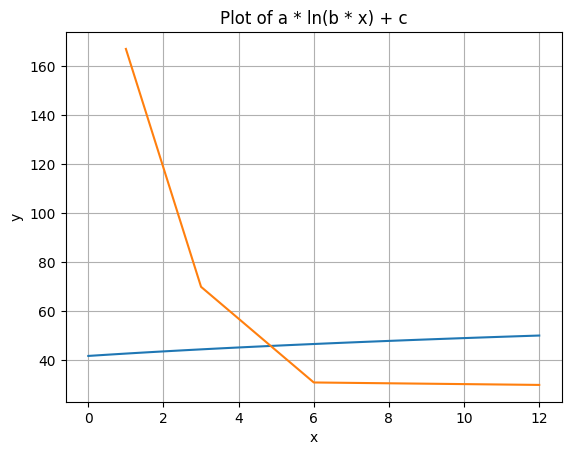

In [141]:
import numpy as np
from scipy.optimize import curve_fit

# Define the logarithmic function
def logarithmic_func(x, a, b, c, d):
    return a * np.log(b * x + c) + d

x_data = np.array([1, 3, 6, 12])
y_data = np.array([167, 70, 31, 30])

# Fit the logarithmic function to the data
popt, pcov = curve_fit(logarithmic_func, x_data, y_data, bounds=(1, 12))

# popt contains the optimized values for the parameters
a_opt, b_opt, c_opt, d_opt = popt

print("Optimized parameters:")
print("a:", a_opt)
print("b:", b_opt)
print("c:", c_opt)
print("d:", d_opt)

x = np.linspace(0, 12, 100)
y = a_opt * np.log(b_opt * x + c_opt) + d_opt

plt.plot(x, y)
plt.plot(x_data, y_data)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of a * ln(b * x) + c')
plt.grid(True)
plt.show()

a: -0.14494477859933963
b: 2.718281828459045
c: -1
d: 4.825843158446976


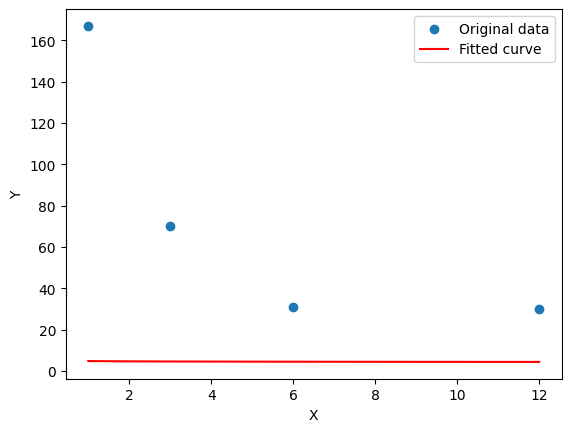

In [140]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

x_data = np.array([1, 3, 6, 12])
y_data = np.array([80, 70, 31, 30])

# Linearize the equation: y = a * log(b * x + c) + d
# Take the logarithm of both sides
y_log = np.log(y_data - 1)  # Subtract 1 to avoid log(0)

# Fit a linear equation to the linearized data
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_log)

# Recover the parameters of the original logarithmic function
a = slope
d = intercept
b = np.exp(1)  # Base of the natural logarithm (e)
c = -1  # Constant term adjustment

# Print the parameters
print("a:", a)
print("b:", b)
print("c:", c)
print("d:", d)

# Plot the original data and the fitted curve
x_values = np.linspace(min(x_data), max(x_data), 100)
y_values = a * np.log(b * x_values + c) + d

plt.scatter(x_data, y_data, label='Original data')
plt.plot(x_values, y_values, color='red', label='Fitted curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [198]:
np.log(0)

/tmp/ipykernel_3499200/2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

[-4.   1.  -0.5 20. ]
[-3.99999999  1.         -0.5        20.        ]
[-4.          1.00000001 -0.5        20.        ]
[-4.          1.         -0.49999999 20.        ]
[-4.          1.         -0.5        20.00000001]
[-4.85114012  1.         -0.85107033 19.60973071]
[-4.85114011  1.         -0.85107033 19.60973071]
[-4.85114012  1.00000001 -0.85107033 19.60973071]
[-4.85114012  1.         -0.85107032 19.60973071]
[-4.85114012  1.         -0.85107033 19.60973072]
[-4.27645953  1.         -0.61403145 19.87323631]
[-4.27645952  1.         -0.61403145 19.87323631]
[-4.27645953  1.00000001 -0.61403145 19.87323631]
[-4.27645953  1.         -0.61403144 19.87323631]
[-4.27645953  1.         -0.61403145 19.87323632]
[-5.66685151  1.         -0.57222211 19.05067923]
[-5.6668515   1.         -0.57222211 19.05067923]
[-5.66685151  1.00000001 -0.57222211 19.05067923]
[-5.66685151  1.         -0.5722221  19.05067923]
[-5.66685151  1.         -0.57222211 19.05067924]
[-5.50036366  1.         -0.

/tmp/ipykernel_3499200/781419033.py:29: RuntimeWarning: invalid value encountered in log
  y_pred = a * np.log(x_data + c) + d
/tmp/ipykernel_3499200/781419033.py:66: RuntimeWarning: invalid value encountered in log
  y = a * np.log(x + c) + d


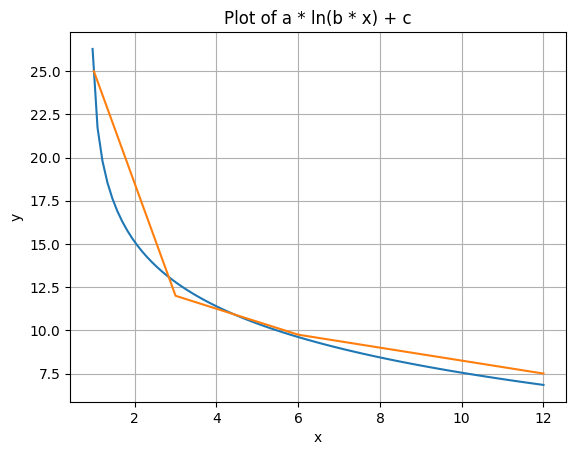

In [287]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.optimize import Bounds
import sys

epsilon = 0.0001
# Define the bounds for each coefficient
bounds = Bounds([-np.inf, epsilon, -np.inf, -np.inf], [-epsilon, np.inf, -0.1, np.inf])

# Updated data points
x_data = np.array([1, 3, 6, 12])
y_data = np.array([25, 12, 9.75, 7.5])


# Objective function: Mean Squared Error
def objective_mse(x_data, y_data):
    def mse_curried(coefficients): 
        a, b, c, d = coefficients
        y_pred = a * np.log(x_data + c) + d
        return np.mean((y_data - y_pred)**2)
    
    return mse_curried

# Objective function: Mean Squared Error
def mse(coefficients, x_data, y_data):
    print(coefficients)
    a, b, c, d = coefficients
    y_pred = a * np.log(x_data + c) + d
    return np.mean((y_data - y_pred)**2)
    

def ssr(coefficients, x_data, y_data):
    
    a, b, c, d = coefficients
    y_pred = a * np.log(b * x_data + c) + d
    return np.sum((y_data - y_pred)**2)

# # Constraint: The derivative must be non-positive for x in [1, 12]
# def constraint(coefficients, x_data):
#     a, b, c, d = coefficients
#     # Derivative of the function

#     divisor = (b * x_data + c)
#     if len(list(filter(lambda x: x <= 0, divisor))) > 0:
#         return [-1] * len(x_data)
#     else:
#         derivative =  a * b / divisor
#         return -derivative
#     # return np.hstack((-derivative, b * x_data + c))
# -> constraint not needed, works through the parameter bounds 

# Initial guess for the coefficients
initial_guess = [-4, 1, -0.5, 20]

# Define the constraints dictionary
constraints = {'type': 'ineq', 'fun': constraint, 'args': (x_data, )}

# Perform the optimization
result = minimize(mse, initial_guess, args=(x_data, y_data), bounds=bounds)
a, b, c, d = result.x

print(result.success)

x = np.linspace(0, 12, 100)
y = a * np.log(x + c) + d

print(f'{a}, {b}, {c}, {d}')

plt.plot(x, y)
plt.plot(x_data, y_data)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of a * ln(b * x) + c')
plt.grid(True)
plt.show()


True
0.13931684297879615, -6.687208451294748, 69.4120995695886


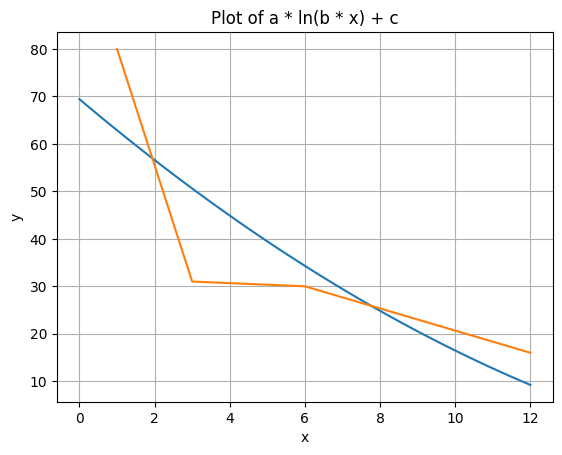

In [288]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.optimize import Bounds
import sys

epsilon = 0.0001
# Define the bounds for each coefficient
bounds = Bounds([0.1, -np.inf, -np.inf], [np.inf, np.inf, np.inf])

# Updated data points
x_data = np.array([1, 3, 6, 12])
y_data = np.array([80, 31, 30, 16])

# Objective function: Mean Squared Error
def mse(coefficients, x_data, y_data):
    a, b, c = coefficients
    y_pred = a * x_data**2 + b * x_data + c
    return np.mean((y_data - y_pred)**2)
    

def ssr(coefficients, x_data, y_data):
    
    a, b, c, d = coefficients
    y_pred = a * np.log(b * x_data + c) + d
    return np.sum((y_data - y_pred)**2)


def constraint(coefficients, x_data):
    a, b, c = coefficients
    derivative = 4 * a * x_data + b
    return -derivative

# # Constraint: The derivative must be non-positive for x in [1, 12]
# def constraint(coefficients, x_data):
#     a, b, c, d = coefficients
#     # Derivative of the function

#     divisor = (b * x_data + c)
#     if len(list(filter(lambda x: x <= 0, divisor))) > 0:
#         return [-1] * len(x_data)
#     else:
#         derivative =  a * b / divisor
#         return -derivative
#     # return np.hstack((-derivative, b * x_data + c))
# -> constraint not needed, works through the parameter bounds 

# Initial guess for the coefficients
initial_guess = [0.2, -4, 14]

# Define the constraints dictionary
constraints = {'type': 'ineq', 'fun': constraint, 'args': (x_data, )}

# Perform the optimization
result = minimize(mse, initial_guess, args=(x_data, y_data), constraints=constraints, bounds=bounds)
a, b, c = result.x

print(result.success)

x = np.linspace(0, 12, 100)
y = a * x**2 + b * x + c

print(f'{a}, {b}, {c}')

plt.plot(x, y)
plt.plot(x_data, y_data)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of a * ln(b * x) + c')
plt.grid(True)
plt.show()


In [59]:
import numpy as np
from scipy.optimize import minimize
from scipy.interpolate import interp1d

# Data points
x_data = np.array([1, 3, 6, 12])
y_data = np.array([50, 24, 15, 12])

# Linear interpolation
interp = interp1d(x_data, y_data, kind='quadratic', fill_value="extrapolate")

# Define a range of x values for fitting
x_fit = np.linspace(1, 12, 100)

# Fit the polynomial with interpolation
y_fit = interp(x_fit)


def objective_mse(x_fit, y_fit):
    def mse_curried(coefficients): 
        a, b, c = coefficients
        y_pred = a * x_fit**2 + b * y_fit + c
        return np.mean((y_fit - y_pred)**2)
    
    return mse_curried

# Constraint: The derivative must be non-positive for x in [1, 12]
def constraint(coefficients):
    a, b, c = coefficients
    # Derivative of the polynomial: 2ax + b <= 0
    return -np.array([2 * a * x + b for x in x_fit])

# Initial guess for the coefficients
initial_guess = [0.1, -1, 10]

# Define the constraints dictionary
constraints = {'type': 'ineq', 'fun': constraint}

# Perform the optimization
result = minimize(objective_mse(y_data, x_data), initial_guess, constraints=constraints)
a, b, c = result.x

# Print the optimized coefficients
print(f"Coefficients: a={a}, b={b}, c={c}")

# Calculate the R-squared value
y_pred = a * x_data**2 + b * x_data + c
ss_res = np.sum((y_data - y_pred)**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)

print(f"R-squared: {r_squared}")

# Plot the result
import matplotlib.pyplot as plt

plt.scatter(x_data, y_data, color='red', label='Data Points')
plt.plot(x_fit, interp(x_fit), 'b--', label='Interpolation')
plt.plot(x_fit, a * x_fit**2 + b * x_fit + c, 'g-', label='Fitted Polynomial')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Monotonically Decreasing Polynomial Fit')
plt.show()

NotImplementedError: biquadratic is unsupported: Use fitpack routines for other types.